# Homework 1

## Введение в OpenAI Gym

 <a href=https://gym.openai.com>OpenAI Gym</a> это набор инструментов для разработки и сравнения алгоритмов обучения с подкреплением.

OpenAI Gym предоставляет простой и универсальный API ко многим средам с разными свойствами, как простым так и сложным:
* Классические задачи управления и игрушечные примеры, которые можно найти в учебниках и на которых демонстрируется работа алгоритмов обучения с подкреплением (в основном они будут использоваться в этом курсе)
* Игры Atari (оказали огромное влияние на достижения в обучении с подкреплением в последние годы)
* 2D и 3D среды для контроля роботов в симуляции (используют проприетарный движок <a href=http://www.mujoco.org/>MuJoCo</a>)

Запустим агента со случайными действиями в среде <a href=https://gym.openai.com/envs/CartPole-v0>CartPole-v0</a>. В этой среде агент должен удержать шест, который закреплен на тележке, в вертикальном положении. Агент может прикладывать силу *+1* или *-1* к тележке в попытке удержать шест. Эпизод игры заканчивается, если шест отклоняется от вертикального положения больше, чем на *15* градусов или тележка сдвигается больше, чем на *2.4* единицы расстояния от центра. За каждый шаг времени, когда шест находится в вертикальном положении, агент получает награду в размере *+1* очко. Задаче считается "решенной" при получении агентом средней за 100 попыток награды *195* очков.

#### Для работы нам потребуется установить gym и numpy. Gym следует установить командой pip install gym=0.9.2

In [149]:
# Импортируем необходимые библиотеки
from tqdm import tqdm, tqdm_notebook
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0') # создаем среду CartPole-v0

In [3]:
env.reset()
for _ in range(1000):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # агент выбирает случайные действия
    if done:
        env.reset()

In [5]:
env.close() # выключим визуализацию

Вспомним элементы проблемы обучения с подкреплением <img src="./scheme.png" width=500>

OpenAI Gym предоставляет такой же интерфейс взаимодействия со средой:
* Среда в ответ на действие агента предоставляет *bservation (object)*- специфичный для конкретной среды объект, который предствляет наблюдения агента. Например, пиксели камеры, значения углов и скоростей сочленений робота или позиции агента и других объектов в среде.
* *reward (float)* - значение награды, полученной агентом в резултате совершенного действия
* *done (boolean)* - флаг обозначающий окончание эпизода. Например, эпизод заканчивается, когда шест слишком сильно отклонился или агент попал в прорубь в среде FrozenLake
* *info (dict)* - словарь, содержащий диагностическую информацию, которую можно использовать для отладки, но не для обучения агента. Обычно мы присваеваем значение *info* переменной по-умолчению *_*

Теперь, когда мы познакомились с API OpenAI Gym, посмотрим, сколько очков награды сможет в среднем получить за 100 эпизодов агент, выбирающий случайные действия.

In [6]:
total_reward = []
env = gym.make('CartPole-v0')
for episode in range(100):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)

Episode 1 finished after 14 timesteps
Episode 2 finished after 37 timesteps
Episode 3 finished after 21 timesteps
Episode 4 finished after 31 timesteps
Episode 5 finished after 17 timesteps
Episode 6 finished after 13 timesteps
Episode 7 finished after 37 timesteps
Episode 8 finished after 18 timesteps
Episode 9 finished after 66 timesteps
Episode 10 finished after 13 timesteps
Episode 11 finished after 24 timesteps
Episode 12 finished after 13 timesteps
Episode 13 finished after 15 timesteps
Episode 14 finished after 14 timesteps
Episode 15 finished after 14 timesteps
Episode 16 finished after 42 timesteps
Episode 17 finished after 12 timesteps
Episode 18 finished after 21 timesteps
Episode 19 finished after 67 timesteps
Episode 20 finished after 26 timesteps
Episode 21 finished after 19 timesteps
Episode 22 finished after 14 timesteps
Episode 23 finished after 15 timesteps
Episode 24 finished after 17 timesteps
Episode 25 finished after 16 timesteps
Episode 26 finished after 16 times

In [7]:
env.close()

In [8]:
print(np.mean(total_reward))

23.01


Наш "cлучайный" агент получает в среднем 20 очков за 100 эпизодов. Не очень впечатляет.

0

In [12]:
##############
total_reward = []
env = gym.make('CartPole-v0')
for episode in range(100):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        env.render()
        action = t%2
        observation, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)
env.close()
print('Агент "туда сюда"->|<-|->|<-|->  получает в среднем %f очков за 100 эпизодов. Не очень впечатляет.'%np.mean(total_reward))
##############

Episode 1 finished after 39 timesteps
Episode 2 finished after 25 timesteps
Episode 3 finished after 30 timesteps
Episode 4 finished after 42 timesteps
Episode 5 finished after 38 timesteps
Episode 6 finished after 32 timesteps
Episode 7 finished after 56 timesteps
Episode 8 finished after 29 timesteps
Episode 9 finished after 39 timesteps
Episode 10 finished after 39 timesteps
Episode 11 finished after 26 timesteps
Episode 12 finished after 26 timesteps
Episode 13 finished after 29 timesteps
Episode 14 finished after 28 timesteps
Episode 15 finished after 30 timesteps
Episode 16 finished after 53 timesteps
Episode 17 finished after 80 timesteps
Episode 18 finished after 88 timesteps
Episode 19 finished after 41 timesteps
Episode 20 finished after 27 timesteps
Episode 21 finished after 31 timesteps
Episode 22 finished after 22 timesteps
Episode 23 finished after 22 timesteps
Episode 24 finished after 21 timesteps
Episode 25 finished after 49 timesteps
Episode 26 finished after 25 times

В предыдущием эксперименте агент выбирал случайное действие. Важными объектами в OpenAI Gym являются пространства состояний и действий.

In [13]:
env = gym.make('CartPole-v0')

In [14]:
print(env.action_space.__doc__)


    {0,1,...,n-1}

    Example usage:
    self.observation_space = spaces.Discrete(2)
    


In [15]:
print(env.action_space)

Discrete(2)


In [16]:
print(env.action_space.n)

2


In [17]:
print(env.observation_space.__doc__)


    A box in R^n.
    I.e., each coordinate is bounded.

    Example usage:
    self.action_space = spaces.Box(low=-10, high=10, shape=(1,))
    


In [18]:
print(env.observation_space)

Box(4,)


In [19]:
print(env.observation_space.shape)

(4,)


In [20]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [21]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

## Value Iteration

На лекции мы рассмотрели, как мы можем выучить оптимальную политику, используя алгоритм Value Iteration, если нам известна динамика среды, а также если пространства состояний и действий не большие и дискретные.

Попробуем выучить оптимальную политику в среде <a href=https://gym.openai.com/envs/FrozenLake-v0>FrozenLake-v0</a>. Это простая среда с маленькими пространствами состояний и действий, а также с известной динамикой

Созданим среду и выведем её описание

In [83]:
env = gym.make('FrozenLake-v0')

In [84]:
print(env.env.__doc__)


    Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following

        SFFF
        FHFH
        FFFH
        HFFG

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.

    


Как видно среда представляет собой поле 4 на 4, по которому нужно добраться от начала (клетка *S*) до цели (клетка *G*). При этом среда является недетерменированный - с определенной вероятностью при совершения действия агент подскользнется и попадет не в ту клетку, в которую направлялся. Клетка *H* обозначает прорубь. Игра закначивается, когда агент попадает в клетку *G* или в клету *H*. Если агент проваливается в прорубь, то он получает награду *0*, если достигает клетки цели - *1*. 

Посмотрим, сколько в среднем очков награды за 100 эпизодов получит наш агент, если будет выполнять случайные действия.

In [85]:
env.seed(0)
# from gym.spaces import prng; prng.seed(10) # установим сид для воспроизводимости результатов эксперимента

[0]

In [86]:
total_reward = []
for episode in range(100):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 1 finished after 15 timesteps

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 2 finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 3 finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 4 finished after 11 timesteps

SFFF
FHFH
FFFH
HFFG
  (Do

SFFF
FHFH
FFFH
HFFG
Episode 40 finished after 8 timesteps

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
Episode 41 finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 42 finished after 5 timesteps

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode 43 finished after 7 timesteps

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode 44 finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH

In [87]:
print(np.mean(total_reward))

0.01


Как видим, только в 3 эпизодах из 100 агену удалось добраться до цели.

In [88]:
env.reset()
for _ in range(100):
    env.render()
    action = env.action_space.sample() # take a random action
    observation, reward, done, _ = env.step(action)
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


Из среды OpenAI Gym мы можем получить элементы MDP (Markov Decision Process)

В env.env.P хранится двухуровневый словарь, в котором первый ключ является состояние, а второй - действием.
Клетки ассоциированыс индексами [0, 1, 2, ..., 15] слева направо и сверху вниз.

In [89]:
print(np.arange(16).reshape(4,4))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Индексы действией [0, 1, 2, 3] соответствуют движению на Запад, Юг, Восток и Север.
env.env.P[state][action] возвращает лист кортежей (probability, nextstate, reward). Например, состояние 0 - это начальное состояние и информация о веротностях перехода для s=0 и a=0 содержит:

In [90]:
env.env.P[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False)]

Другой пример - состояние 5 сооветсвует проруби, и все действия в данном состоянии приводят к тому же состоянию с вероятностью 1 и наградой 0

In [91]:
for i in range(4):
    print("P[5][%i] =" % i, env.env.P[5][i])

P[5][0] = [(1.0, 5, 0, True)]
P[5][1] = [(1.0, 5, 0, True)]
P[5][2] = [(1.0, 5, 0, True)]
P[5][3] = [(1.0, 5, 0, True)]


Вспомним, что из себя представляет алгоритм Value Iteration <img src="./value_iteration.png" width="500">

Задание считается решенным, если агент доходит до цели в среднем в 70% эпизодов.

In [92]:
n_states = env.env.nS
n_actions = env.env.nA
print("Number of states: {}".format(n_states))
print("Number of actions: {}".format(n_actions))

Number of states: 16
Number of actions: 4


Напишем несклько вспомогательных функций.

Поскольку алгоритм Value Iteration возвращает нам оптимальную V-функцию, то нам необходимо извлекать из нее оптимальную политику (как указано в последней строке псевдокода алгоритма)

In [93]:
def extract_policy(v, gamma = 1.0):
    policy = np.zeros(n_states)
    for state in range(n_states):
        q = np.zeros(n_actions)
        for action in range(n_actions):
            for next_sr in env.env.P[state][action]:
                probability, next_state, reward, _ = next_sr
                q[action] += (probability*(reward + gamma*v[next_state]))
        policy[state] = np.argmax(q)
    return policy

Также напишем функцию для оценки нашей найденной политики.

In [94]:
def evaluate_policy(env, policy, gamma=1.0, n=100):
    total_reward = []
    for episode in range(n):
        episode_reward = 0
        observation = env.reset()
        step = 0
        for _ in range(100):
            env.render()
            action = int(policy[observation])
            observation, reward, done, _ = env.step(action)
            episode_reward += gamma**step*reward
            step += 1
            if done:
                break
        total_reward.append(episode_reward)
    return np.mean(total_reward)

Нам остается написать основную функцию, которая вернет оптимальную V-функцию.

In [95]:
import sys

def value_iteration(env, gamma=1.0, max_iterations = 100000):
    v = np.zeros(n_states)
    eps = 1e-20
    # Your code goes here
    for i in range(max_iterations):
        v_last = v.copy()
        for s in range(n_states):
            q_temp = []
            for act in range(env.action_space.n):
                q_temp.append(np.sum([p*(r + gamma * v_last[s_]) for p, s_, r, _ in env.env.P[s][act]]))
                
            v[s] = max(q_temp)
            
        if (np.sum(np.fabs(v_last - v)) <= eps):
            sys.stdout.write('Converged, on %d. iteration'%(i+1))
            break
    return v

Теперь мы можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [96]:
optimal_v = value_iteration(env)
optimal_policy = extract_policy(optimal_v)
optimal_policy_score = evaluate_policy(env, optimal_policy, n=100)

Converged, on 1373. iteration
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (R

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Le

In [97]:
print(optimal_v.reshape(4,4))

[[0.82352941 0.82352941 0.82352941 0.82352941]
 [0.82352941 0.         0.52941176 0.        ]
 [0.82352941 0.82352941 0.76470588 0.        ]
 [0.         0.88235294 0.94117647 0.        ]]


In [98]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [99]:
optimal_policy_score

0.76

По сравнению со "случайным" агентом, который доходил до цели в 3 случаях из 100, наша новая политика позволяет добирться до цели в ~70% эпизодов.

## Policy Iteration

Вспомним, что из себя представляет алгоритм Policy Iteration <img src="policy_iteration.png" width="500">

Напишем необходимые вспомогательные функции.

Начнем с основного цикла алгоритма, который вернет нам оптимальную политику.

In [116]:
def policy_iteration(env, gamma=1.0, max_iterations = 200000):
    policy = np.random.choice(n_actions, size=(n_states))  # initialize a random policy
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

А также еще раз напишем функцию для оценки найденной политики.

In [117]:
def evaluate_policy(env, policy, gamma=1.0, n=100):
    total_reward = []
    for episode in range(n):
        episode_reward = 0
        observation = env.reset()
        step = 0
        for _ in range(100):
            env.render()
            action = int(policy[observation])
            observation, reward, done, _ = env.step(action)
            episode_reward += gamma**step*reward
            step += 1
            if done:
                break
        total_reward.append(episode_reward)
    return np.mean(total_reward)

Остается написать 2 функции, которые используются в основном цикле алгоритма Policy Iteration согласно псевдокоду.

In [127]:
def compute_policy_v(env, policy, gamma=1.0):
    v = np.zeros(n_states)
    eps = 1e-10
    # Your code goes here
    iteration_policy = 0
    while True:
        iteration_policy+=1
        v_last = np.copy(v)
        for s in range(n_states):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * v_last[s_]) for p, s_, r, _ in env.env.P[s][policy_a]])
        if (np.sum((np.fabs(v-v_last))) <= eps):
            # value converged
            sys.stdout.write('compute_policy_v converged, on %d. iteration'%(iteration_policy))
            break
    return v

In [128]:
def extract_policy(v, gamma=1.0):
    policy = np.zeros(n_states)
    # Your code goes here
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

Теперь мы также можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [129]:
optimal_policy = policy_iteration(env)
optimal_policy_score = evaluate_policy(env, optimal_policy)

compute_policy_v converged, on 104. iterationcompute_policy_v converged, on 701. iterationcompute_policy_v converged, on 879. iterationPolicy-Iteration converged at step 3.

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HF

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFF

In [130]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [131]:
print(optimal_policy_score)

0.83


## Дополнительное задание

Сравнить поведение случайного агента с обученным вышеприведенными методами агентом в средах из OpenAI Gym с известной динамикой <a href="https://gym.openai.com/envs/Taxi-v2/">Taxi-v2</a> и CliffWalking. Посмотрите как ведет себя агент при использовании разных значений фактора дисконтирования. 

Ко всем средам OpenAi Gym можно получить доступ не только через *gym.make* но и через обычный импорт модулей. Среда CliffWalking ипортируется именно так. 

## 1. Taxi-v2

##### Краткое описание среды

In [141]:
print(env.__doc__)

None


In [133]:
env = gym.make('Taxi-v2')
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Representations

| --> WALL (Can't pass through, will remain in the same position if tries to move through wall)

Yellow --> Taxi Current Location

Blue --> Pick up Location

Purple --> Drop-off Location

Green --> Taxi turn green once passenger board

Letters --> Locations

In [136]:
print("Total number of environments: %d"%env.observation_space.n)

Total number of environments: 500


In [137]:
print("Total number of environments: %d"%env.action_space.n)

Total number of environments: 6


Actions (6 in total)

    0: move south
    1: move north
    2: move east
    3: move west
    4: pickup passenger
    5: dropoff passenger

1) Random walking

In [198]:
env = gym.make('Taxi-v2')
random_policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA
def random_policy_steps_count():
    state = env.reset()
    counter = 0
    reward = None
    while reward != 20:
        sys.stderr.write('\r%d'%counter)
        state, reward, done, info = env.step(env.action_space.sample())  
        counter += 1
    return counter

In [153]:
counts = [random_policy_steps_count() for i in tqdm(range(1000))]


756%|          | 1/1000 [00:00<01:47,  9.29it/s]
1727|          | 2/1000 [00:00<01:48,  9.18it/s]
237%|          | 3/1000 [00:00<02:24,  6.92it/s]
4108|          | 4/1000 [00:00<02:14,  7.42it/s]
866%|          | 6/1000 [00:01<03:42,  4.47it/s]
2183|          | 7/1000 [00:01<03:10,  5.20it/s]
378%|          | 8/1000 [00:01<03:52,  4.28it/s]
5124|          | 10/1000 [00:01<02:57,  5.58it/s]
3371|          | 11/1000 [00:02<05:30,  3.00it/s]
874%|          | 12/1000 [00:02<06:11,  2.66it/s]
5348|▏         | 13/1000 [00:03<05:09,  3.19it/s]
1116|▏         | 14/1000 [00:03<07:19,  2.24it/s]
1444|▏         | 15/1000 [00:04<06:05,  2.69it/s]
998%|▏         | 17/1000 [00:04<04:54,  3.34it/s]
3836|▏         | 18/1000 [00:04<04:18,  3.80it/s]
3384|▏         | 19/1000 [00:05<05:48,  2.81it/s]
4598|▏         | 20/1000 [00:05<06:33,  2.49it/s]
9202|▏         | 21/1000 [00:06<07:37,  2.14it/s]
238%|▏         | 22/1000 [00:07<11:26,  1.42it/s]
1593|▏         | 23/1000 [00:07<08:30,  1.91it/s]
2684|▏

1055|█▋        | 174/1000 [00:54<03:04,  4.47it/s]
1546|█▊        | 176/1000 [00:55<02:33,  5.38it/s]
3870|█▊        | 177/1000 [00:55<02:47,  4.90it/s]
453%|█▊        | 178/1000 [00:55<04:04,  3.36it/s]
1669|█▊        | 179/1000 [00:56<03:19,  4.11it/s]
2486|█▊        | 182/1000 [00:56<02:46,  4.90it/s]
2763|█▊        | 183/1000 [00:56<03:32,  3.84it/s]
3001|█▊        | 184/1000 [00:57<04:02,  3.37it/s]
939%|█▊        | 185/1000 [00:57<04:42,  2.88it/s]
1941|█▊        | 186/1000 [00:57<03:50,  3.54it/s]
8054|█▉        | 188/1000 [00:58<03:22,  4.01it/s]
3492|█▉        | 189/1000 [00:59<07:06,  1.90it/s]
4985|█▉        | 190/1000 [00:59<06:55,  1.95it/s]
1014|█▉        | 191/1000 [01:00<07:35,  1.78it/s]
4954|█▉        | 192/1000 [01:00<06:03,  2.22it/s]
4338|█▉        | 194/1000 [01:01<05:36,  2.39it/s]
1476|█▉        | 195/1000 [01:01<06:23,  2.10it/s]
2465|█▉        | 196/1000 [01:02<05:25,  2.47it/s]
1072|█▉        | 197/1000 [01:02<05:13,  2.57it/s]
13779█▉        | 198/1000 [01:0

1009|███▌      | 353/1000 [01:45<03:17,  3.27it/s]
6283|███▌      | 354/1000 [01:45<02:55,  3.67it/s]
5215|███▌      | 355/1000 [01:47<05:35,  1.92it/s]
506%|███▌      | 356/1000 [01:47<06:36,  1.63it/s]
2256|███▌      | 357/1000 [01:47<04:57,  2.16it/s]
492%|███▌      | 358/1000 [01:48<04:23,  2.43it/s]
1574|███▌      | 359/1000 [01:48<03:24,  3.13it/s]
4914|███▌      | 360/1000 [01:48<02:59,  3.57it/s]
1229|███▌      | 361/1000 [01:49<04:15,  2.50it/s]
1188|███▋      | 363/1000 [01:49<03:19,  3.20it/s]
2113|███▋      | 364/1000 [01:49<02:52,  3.68it/s]
1108|███▋      | 366/1000 [01:49<02:30,  4.22it/s]
3986|███▋      | 367/1000 [01:50<02:17,  4.60it/s]
658%|███▋      | 369/1000 [01:50<02:31,  4.17it/s]
3398|███▋      | 370/1000 [01:50<02:04,  5.05it/s]
3319|███▋      | 371/1000 [01:51<02:51,  3.68it/s]
1316|███▋      | 372/1000 [01:51<03:35,  2.91it/s]
3364|███▋      | 373/1000 [01:51<03:05,  3.39it/s]
1600|███▋      | 374/1000 [01:52<03:58,  2.62it/s]
4782|███▊      | 375/1000 [01:5

1174|█████▎    | 529/1000 [02:43<01:22,  5.74it/s]
5894|█████▎    | 530/1000 [02:43<01:21,  5.78it/s]
728%|█████▎    | 531/1000 [02:44<02:54,  2.69it/s]
3821|█████▎    | 532/1000 [02:44<02:21,  3.30it/s]
473%|█████▎    | 533/1000 [02:44<02:44,  2.85it/s]
1429|█████▎    | 534/1000 [02:44<02:12,  3.51it/s]
1393|█████▎    | 535/1000 [02:44<01:57,  3.97it/s]
1754|█████▍    | 538/1000 [02:45<01:32,  4.97it/s]
3206|█████▍    | 539/1000 [02:45<01:36,  4.79it/s]
5560|█████▍    | 540/1000 [02:45<02:02,  3.77it/s]
609%|█████▍    | 541/1000 [02:46<03:05,  2.47it/s]
2254|█████▍    | 542/1000 [02:46<02:27,  3.10it/s]
1550|█████▍    | 543/1000 [02:46<02:23,  3.18it/s]
4172|█████▍    | 544/1000 [02:47<02:08,  3.55it/s]
1581|█████▍    | 546/1000 [02:47<02:09,  3.49it/s]
3544|█████▍    | 547/1000 [02:48<02:02,  3.68it/s]
1160|█████▍    | 548/1000 [02:48<02:28,  3.05it/s]
580%|█████▍    | 549/1000 [02:48<02:10,  3.46it/s]
6479|█████▌    | 550/1000 [02:48<01:45,  4.27it/s]
784%|█████▌    | 551/1000 [02:4

668%|███████▏  | 713/1000 [03:37<01:57,  2.45it/s]
13636███████▏  | 714/1000 [03:37<01:30,  3.16it/s]
2446|███████▏  | 715/1000 [03:39<04:15,  1.12it/s]
2698|███████▏  | 717/1000 [03:39<03:15,  1.45it/s]
2393|███████▏  | 718/1000 [03:40<02:49,  1.66it/s]
360%|███████▏  | 719/1000 [03:40<02:31,  1.86it/s]
3533|███████▏  | 720/1000 [03:40<01:54,  2.44it/s]
3500|███████▏  | 721/1000 [03:41<02:06,  2.21it/s]
438%|███████▏  | 722/1000 [03:42<02:15,  2.04it/s]
1390|███████▏  | 723/1000 [03:42<01:44,  2.65it/s]
2680|███████▏  | 724/1000 [03:42<01:31,  3.02it/s]
1133|███████▎  | 725/1000 [03:42<01:37,  2.81it/s]
216%|███████▎  | 728/1000 [03:43<01:04,  4.19it/s]
1277|███████▎  | 730/1000 [03:43<00:49,  5.46it/s]
382%|███████▎  | 732/1000 [03:44<01:12,  3.69it/s]
9292|███████▎  | 733/1000 [03:44<00:59,  4.52it/s]
988%|███████▎  | 734/1000 [03:45<02:17,  1.94it/s]
1142|███████▎  | 735/1000 [03:45<01:49,  2.41it/s]
1391|███████▎  | 736/1000 [03:45<01:28,  2.98it/s]
2723|███████▎  | 737/1000 [03:4

600%|████████▉ | 896/1000 [04:35<00:23,  4.38it/s]
1706|████████▉ | 897/1000 [04:35<00:19,  5.24it/s]
939%|████████▉ | 899/1000 [04:35<00:17,  5.73it/s]
1303|█████████ | 900/1000 [04:35<00:17,  5.70it/s]
1092|█████████ | 901/1000 [04:35<00:17,  5.70it/s]
3009|█████████ | 902/1000 [04:36<00:17,  5.75it/s]
1267|█████████ | 903/1000 [04:36<00:27,  3.59it/s]
1294|█████████ | 904/1000 [04:36<00:26,  3.59it/s]
2161|█████████ | 905/1000 [04:37<00:25,  3.67it/s]
997%|█████████ | 906/1000 [04:37<00:27,  3.38it/s]
4708|█████████ | 907/1000 [04:37<00:24,  3.74it/s]
1790|█████████ | 908/1000 [04:38<00:36,  2.53it/s]
8112|█████████ | 909/1000 [04:38<00:35,  2.55it/s]
2334|█████████ | 910/1000 [04:39<00:57,  1.57it/s]
2522|█████████ | 911/1000 [04:40<00:52,  1.70it/s]
3633|█████████ | 912/1000 [04:40<00:48,  1.81it/s]
1946|█████████▏| 913/1000 [04:41<00:51,  1.68it/s]
2365|█████████▏| 915/1000 [04:41<00:39,  2.18it/s]
5390|█████████▏| 916/1000 [04:42<00:35,  2.40it/s]
5051|█████████▏| 917/1000 [04:4

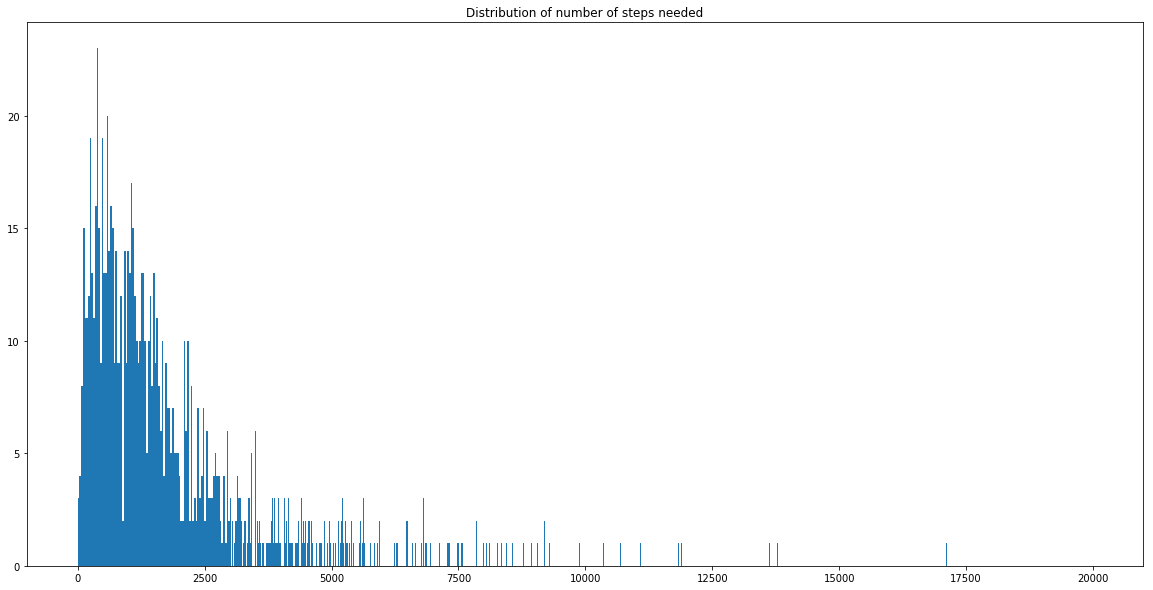

Mean random search agent steps 2068


In [161]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.hist(counts, bins = list(np.linspace(0, 3000, 90))+list(range(3000, 20000, 17)))
plt.title("Number of steps, random search")
plt.show()
print("Mean random search agent steps %d" %int(np.mean(counts)))

In [204]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    V = np.zeros(env.env.nS)
    while True:
        delta = 0
       
        for state in range(env.env.nS):
            val = 0
            
            for action,act_prob in enumerate(policy[state]):
                for prob,next_state,reward,done in env.env.P[state][action]:
                    val += act_prob * prob * (reward + discount_factor * V[next_state])
            delta = max(delta, np.abs(val-V[state]))
            V[state] = val
        if delta < theta:
            break
    return np.array(V)

def policy_iteration(env, policy_eval_fn=policy_eval, discount_factor=1.0, max_iteration = 200000):
    def one_step_lookahead(state, V):
        A = np.zeros(env.env.nA)
        for a in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A

    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA
    iteration = 0
    while True:
        iteration+=1
        # Implement this!
        curr_pol_val = policy_eval_fn(policy, env, discount_factor)
        policy_stable = True 
        for state in range(env.env.nS):
            chosen_act = np.argmax(policy[state])
            act_values = one_step_lookahead(state,curr_pol_val)
            best_act = np.argmax(act_values)
            if chosen_act != best_act:
                policy_stable = False
            policy[state] = np.eye(env.env.nA)[best_act]
        if policy_stable or iteration>max_iteration:
            return policy, curr_pol_val
    
    return policy, np.zeros(env.env.nS)

def value_iteration(env, theta=0.0001, discount_factor=1.0, max_iteration = 200000):    
    def one_step_lookahead(state, V):
        A = np.zeros(env.env.nA)
        for act in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][act]:
                A[act] += prob * (reward + discount_factor*V[next_state])
        return A
    
    V = np.zeros(env.env.nS)
    iteration = 0
    while True:
        iteration += 1
        delta = 0
        for state in range(env.env.nS):
            act_values = one_step_lookahead(state,V) 
            best_act_value = np.max(act_values)
            delta = max(delta,np.abs(best_act_value - V[state]))
            V[state] = best_act_value 
        if delta < theta or iteration > max_iteration:
            break
    policy = np.zeros([env.env.nS, env.env.nA])
    for state in range(env.env.nS):
        act_val = one_step_lookahead(state,V)
        best_action = np.argmax(act_val)
        policy[state][best_action] = 1
        
    
    return policy, V

def count(policy):
    curr_state = env.reset()
    counter = 0
    reward = None
    while reward != 20 and counter<1e4:
        state, reward, done, info = env.step(np.argmax(policy[curr_state]))  
        curr_state = state
        counter += 1
    return counter

### based on kaggle kernel: https://www.kaggle.com/angps95/intro-to-reinforcement-learning-with-openai-gym

In [190]:
env = gym.make('Taxi-v2')
random_policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA
policy_eval(random_policy,env,discount_factor=0.95)

array([-66.98313734, -72.0552561 , -71.82275936, -72.13589542,
       -79.64708927, -79.4270611 , -79.65147432, -79.63871504,
       -79.07254608, -79.10269345, -78.3875735 , -79.10505531,
       -79.81671409, -79.81060032, -79.81765665, -79.6925471 ,
       -59.75288888, -71.33388311, -70.80303096, -71.5180041 ,
       -72.64022323, -75.50799664, -75.3765432 , -75.55359007,
       -79.57926106, -79.3169249 , -79.58448929, -79.56927654,
       -79.23018522, -79.2552079 , -78.66164932, -79.25716827,
       -79.78723155, -79.78013338, -79.78832586, -79.64307314,
       -68.04939921, -74.24901585, -73.94171338, -74.52901578,
       -78.9466788 , -79.3570737 , -79.33826214, -79.36359837,
       -77.88594922, -76.56749029, -77.91222545, -77.83576752,
       -79.71837887, -79.72753061, -79.51044202, -79.7282476 ,
       -79.47489602, -79.45737113, -79.47759776, -79.11898469,
       -75.91030083, -73.61446202, -76.47955166, -76.11404129,
       -79.24493677, -79.5391139 , -79.52562956, -79.54

In [191]:
pol_iter_policy = policy_iteration(env,policy_eval,discount_factor=0.99)
pol_iter_policy[0]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [192]:
val_iter_policy = value_iteration(env,discount_factor=0.99)
val_iter_policy[0]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [173]:
# for x in range(len(pol_iter_policy[0])):
#     if not (pol_iter_policy[0][x] == val_iter_policy[0][x]).all():
#         print("Not the same Policy")
#         break
# print("Same Policy")

Same Policy


100%|██████████| 10000/10000 [00:03<00:00, 3329.80it/s]


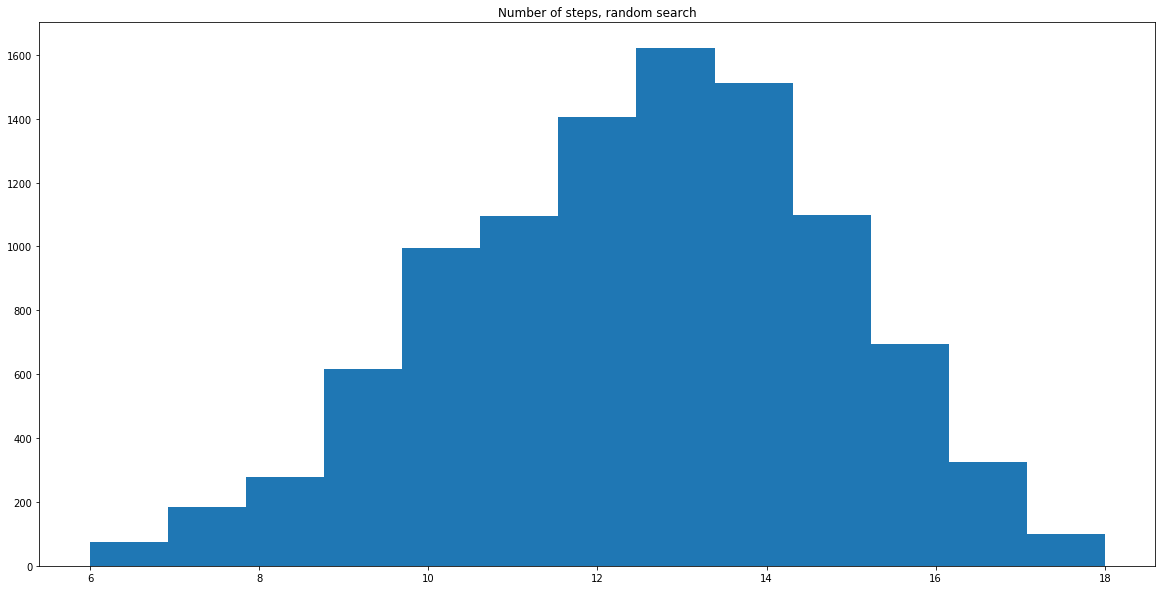

Mean policy iteration agent steps 12


In [180]:
pol_count = count(pol_iter_policy[0])
pol_counts = [count(pol_iter_policy[0]) for i in tqdm(range(10000))]

plt.figure(figsize = (20, 10))
plt.hist(pol_counts, bins = len(set(pol_counts)))
plt.title("Number of steps, random search")
plt.show()
print("Mean policy iteration agent steps %d" %int(np.mean(pol_counts)))

100%|██████████| 10000/10000 [00:03<00:00, 3194.49it/s]


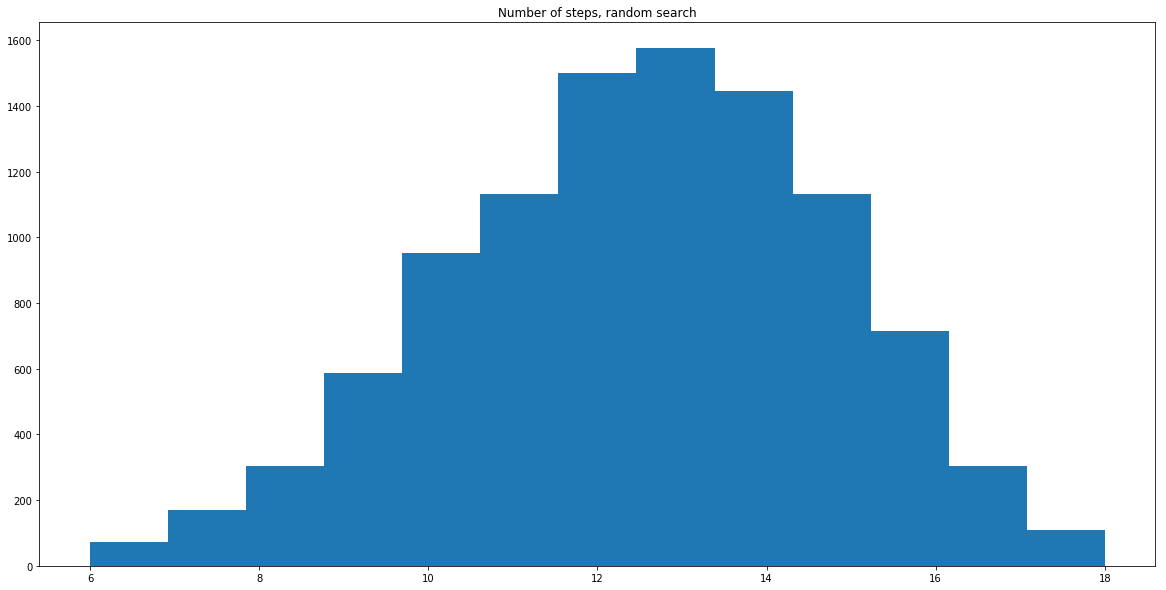

Mean value iteration agent steps 12


In [182]:
val_count = count(val_iter_policy[0])
val_counts = [count(val_iter_policy[0]) for i in tqdm(range(10000))]
plt.figure(figsize = (20, 10))
plt.hist(val_counts, bins = len(set(val_counts)))
plt.title("Number of steps, random search")
plt.show()
print("Mean value iteration agent steps %d" %int(np.mean(val_counts)))

In [218]:
env = gym.make('Taxi-v2')
env.reset()

res = {} 
for discount_factor in tqdm(np.linspace(0.3, 0.99, 10)):
    env = gym.make('Taxi-v2')
    env.reset()
    pol_iter_policy = policy_iteration(env,policy_eval,discount_factor=discount_factor)
    val_iter_policy = value_iteration(env,discount_factor=discount_factor)


    val_counts = [count(val_iter_policy[0]) for i in tqdm(range(1000))]
    pol_counts = [count(pol_iter_policy[0]) for i in tqdm(range(1000))]
    res[discount_factor] = {'value_iteration': val_counts,
                            'policy_iteration': pol_counts}









  0%|          | 0/10 [00:00<?, ?it/s]








  0%|          | 0/1000 [00:00<?, ?it/s]








  0%|          | 4/1000 [00:00<01:11, 13.93it/s]








  1%|          | 11/1000 [00:00<00:57, 17.06it/s]








  1%|▏         | 14/1000 [00:00<01:09, 14.19it/s]








  3%|▎         | 30/1000 [00:00<00:51, 18.98it/s]








  4%|▎         | 35/1000 [00:01<00:51, 18.81it/s]








  4%|▍         | 39/1000 [00:01<00:52, 18.41it/s]








 12%|█▏        | 116/1000 [00:01<00:34, 25.62it/s]








 13%|█▎        | 134/1000 [00:01<00:26, 32.76it/s]








 14%|█▍        | 145/1000 [00:02<00:23, 36.72it/s]








 15%|█▌        | 154/1000 [00:02<00:22, 37.50it/s]








 16%|█▌        | 162/1000 [00:02<00:35, 23.63it/s]








 17%|█▋        | 170/1000 [00:03<00:31, 26.72it/s]








 18%|█▊        | 176/1000 [00:03<00:36, 22.72it/s]








 18%|█▊        | 181/1000 [00:03<00:37, 21.95it/s]








 18%|█▊        | 185/1000 [00:03<00:38, 21.01it/s]








 20%|██        | 2

 23%|██▎       | 229/1000 [00:02<00:09, 84.19it/s]








 24%|██▍       | 240/1000 [00:02<00:12, 61.28it/s]








 26%|██▋       | 265/1000 [00:02<00:11, 65.07it/s]








 27%|██▋       | 274/1000 [00:02<00:13, 53.86it/s]








 28%|██▊       | 285/1000 [00:03<00:15, 47.18it/s]








 29%|██▉       | 292/1000 [00:03<00:16, 42.46it/s]








 30%|███       | 302/1000 [00:03<00:16, 42.47it/s]








 31%|███       | 309/1000 [00:03<00:18, 36.52it/s]








 33%|███▎      | 330/1000 [00:04<00:15, 42.61it/s]








 36%|███▌      | 359/1000 [00:04<00:12, 50.28it/s]








 40%|███▉      | 398/1000 [00:04<00:09, 61.31it/s]








 47%|████▋     | 472/1000 [00:05<00:06, 78.01it/s]








 50%|████▉     | 495/1000 [00:05<00:06, 73.62it/s]








 51%|█████     | 506/1000 [00:05<00:09, 54.21it/s]








 53%|█████▎    | 533/1000 [00:06<00:07, 61.59it/s]








 54%|█████▍    | 542/1000 [00:06<00:09, 50.31it/s]








 57%|█████▋    | 572/1000 [00:06<00:07, 60.63it/s]







 97%|█████████▋| 966/1000 [00:00<00:00, 3201.88it/s]








100%|██████████| 1000/1000 [00:00<00:00, 3079.19it/s]







 70%|███████   | 7/10 [00:50<00:18,  6.11s/it]








  0%|          | 0/1000 [00:00<?, ?it/s]








 36%|███▌      | 355/1000 [00:00<00:00, 3545.21it/s]








 72%|███████▎  | 725/1000 [00:00<00:00, 3587.52it/s]








100%|██████████| 1000/1000 [00:00<00:00, 3423.54it/s]








  0%|          | 0/1000 [00:00<?, ?it/s]








 26%|██▋       | 264/1000 [00:00<00:00, 2630.29it/s]








 56%|█████▌    | 555/1000 [00:00<00:00, 2706.02it/s]








 81%|████████▏ | 813/1000 [00:00<00:00, 2666.93it/s]








100%|██████████| 1000/1000 [00:00<00:00, 2591.18it/s]







 80%|████████  | 8/10 [00:55<00:11,  5.96s/it]








  0%|          | 0/1000 [00:00<?, ?it/s]








 39%|███▉      | 391/1000 [00:00<00:00, 3899.59it/s]








 77%|███████▋  | 772/1000 [00:00<00:00, 3869.56it/s]








100%|██████████| 1000/1000 [00:00<00:00, 3504.36it/s]








  0%|    

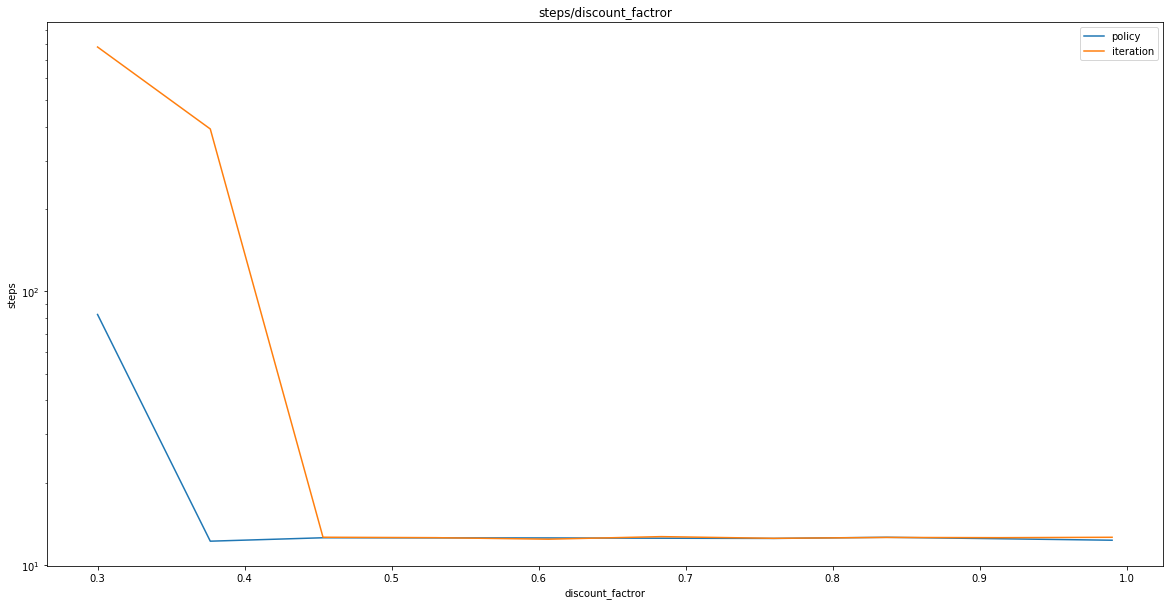

In [222]:
lst_x, lst_policy, lst_iteration = [], [], []
for key, obj in res.items():
    lst_x.append(key)
    lst_policy.append(np.mean(obj['policy_iteration']))
    lst_iteration.append(np.mean(obj['value_iteration']))

plt.figure(figsize = (20, 10))
plt.title('steps/discount_factror')
plt.ylabel('steps')
plt.xlabel('discount_factror')
plt.plot(lst_x, lst_policy, label = 'policy')
plt.plot(lst_x, lst_iteration, label = 'iteration')
plt.yscale('log')
plt.legend()
plt.show()

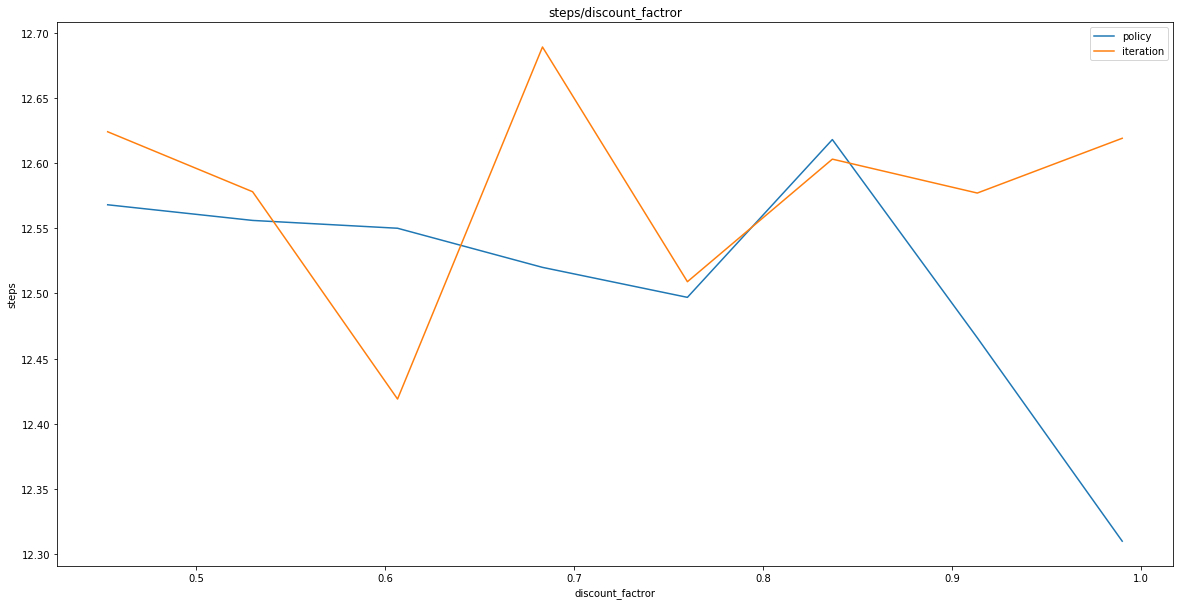

In [223]:
plt.figure(figsize = (20, 10))
plt.title('steps/discount_factror')
plt.ylabel('steps')
plt.xlabel('discount_factror')
plt.plot(lst_x[2:], lst_policy[2:], label = 'policy')
plt.plot(lst_x[2:], lst_iteration[2:], label = 'iteration')
plt.legend()
plt.show()

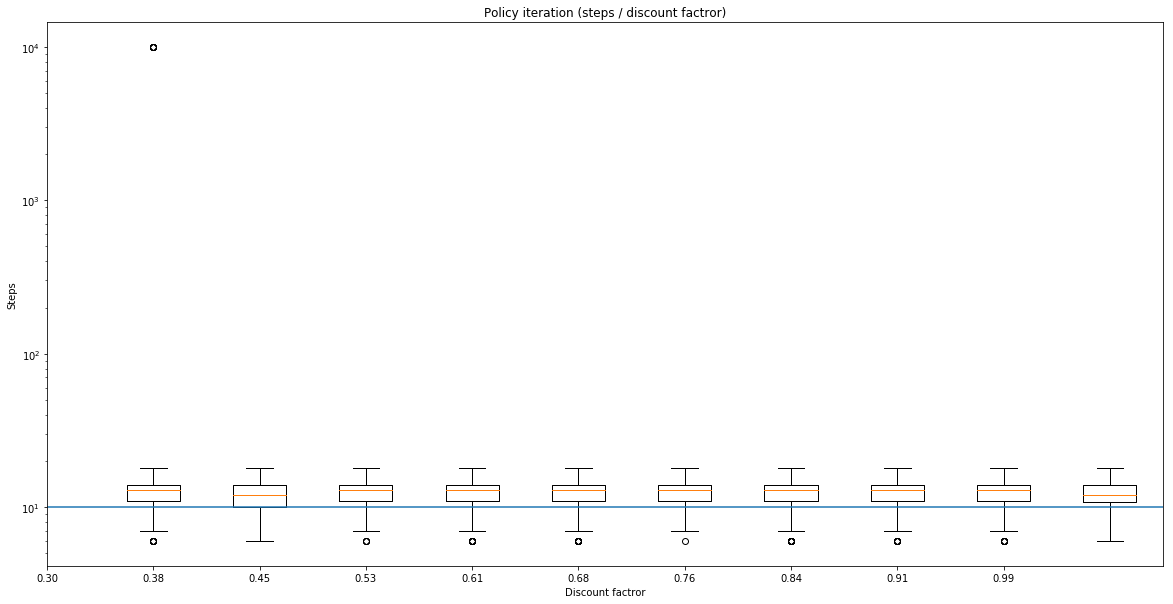

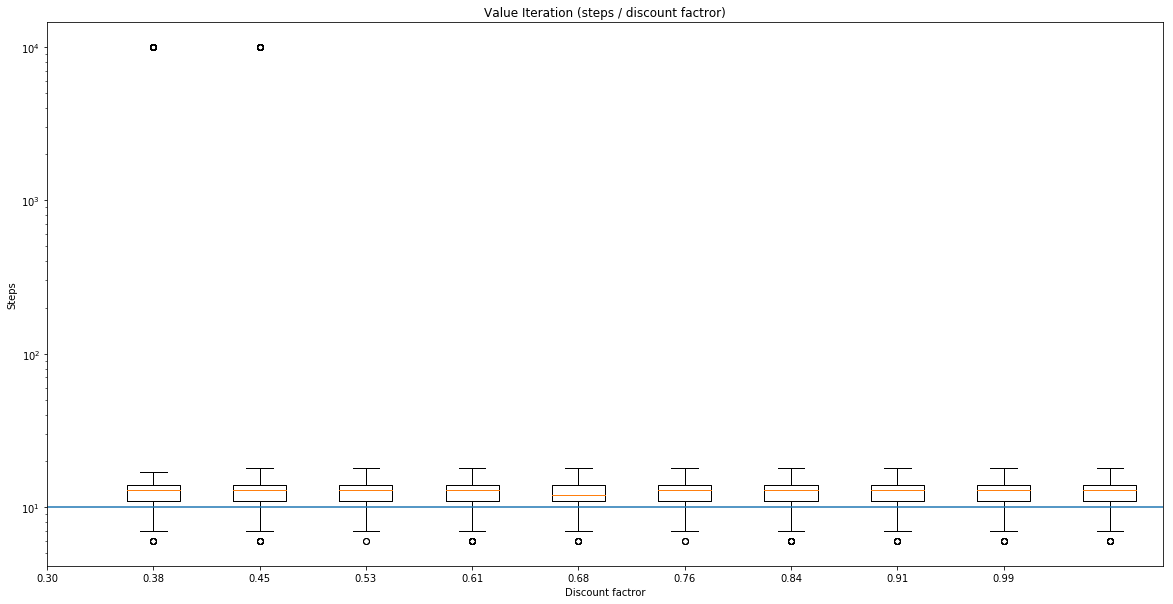

In [235]:
lst_x, lst_policy, lst_iteration = [], [], []
for key, obj in res.items():
    lst_x.append(key)
    lst_policy.append(obj['policy_iteration'])
    lst_iteration.append(obj['value_iteration'])

plt.figure(figsize = (20, 10))
plt.title('Policy iteration (steps / discount factror)')
plt.ylabel('Steps')
plt.xlabel('Discount factror')

plt.boxplot(lst_policy)
plt.plot([0,11],[10, 10])
plt.xticks(list(range(len(lst_x))), ['%2.2f'%i for i in lst_x])
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize = (20, 10))
plt.title('Value Iteration (steps / discount factror)')
plt.ylabel('Steps')
plt.xlabel('Discount factror')

plt.boxplot(lst_iteration)
plt.plot([0,11],[10, 10])
plt.xticks(list(range(len(lst_x))), ['%2.2f'%i for i in lst_x])
plt.yscale('log')
plt.legend()
plt.show()

## Выводы:
1. Policy iteration и value iteration работают примерно одинаково
2. Нет особой разницы, какой фактор дисконтирования выбрать, главное чтобы больше ~0.3, меньше алгоритм расходится.
3. Количество итераций до сходимости алгоритма зависит от фактора дисконцирования